In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

from sklearn.preprocessing import MinMaxScaler
import multiprocessing

In [2]:
# mysql username, password, and database name
MYSQL_ADDRESS = '127.0.0.1'

MYSQL_PORT = '3306'
MYSQL_USERNAME = 'raymond'
MYSQL_PASSWORD = '12345'
MYSQL_DBNAME = 'appstechlabs'


mysql_str = ('mysql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=MYSQL_USERNAME, password=MYSQL_PASSWORD, ipaddress=MYSQL_ADDRESS, port=MYSQL_PORT, dbname=MYSQL_DBNAME))
engine = create_engine(mysql_str)

In [3]:
appstech_labs_id = 1
df = pd.read_sql_query(f"SELECT * FROM user_sales_table where business_id='{appstech_labs_id}'", engine, index_col='txn_date', parse_dates=['txn_date'])
df.head()

,Id,business_id,source,customer_name,customer_id,customer_tel,sales_type,gross_amount,gross_cost,margin,...,business_currency,business_currency_symbol,txn_currency,txn_currency_symbol,due_date,exchange_rate,active,created_on,updated_on,deleted_on
txn_date,,,,,,,,,,,,,,,,,,,,,
2020-10-12,9,1,quickbooks,Amy's Bird Sanctuary,1,(650) 555-3311,INVOICE,100.0,0.0,100.0,...,USD,$,USD,$,2020-11-11,1.0,1,2020-12-03 08:25:04,2020-12-03 08:25:07,None
2020-06-30,10,1,quickbooks,Bill's Windsurf Shop,2,(415) 444-6538,INVOICE,175.0,0.0,175.0,...,USD,$,USD,$,2020-07-30,1.0,1,2020-12-03 08:25:04,2020-12-03 08:25:07,None
2020-10-10,11,1,quickbooks,Dylan Sollfrank,6,None,SALE,337.5,0.0,337.5,...,USD,$,USD,$,NaT,1.0,1,2020-12-03 08:25:04,2020-12-03 08:25:07,None
2020-10-03,12,1,quickbooks,Cool Cars,3,(415) 555-9933,INVOICE,2194.0,22.5,2171.5,...,USD,$,USD,$,2020-11-02,1.0,1,2020-12-03 08:25:04,2020-12-03 08:25:07,None
2020-10-06,13,1,quickbooks,55 Twin Lane,9,(650) 555-0987,INVOICE,50.0,0.0,50.0,...,USD,$,USD,$,2020-11-05,1.0,1,2020-12-03 08:25:04,2020-12-03 08:25:07,None


In [4]:
df.shape

(37, 23)

In [5]:
threshold = 0.7
df.isna().sum()

Id                           0
business_id                  0
source                       0
customer_name                0
customer_id                  0
customer_tel                 1
sales_type                   0
gross_amount                 0
gross_cost                   0
margin                       0
discount_amount              0
tax_amount                   0
invoice_balance              0
business_currency            0
business_currency_symbol     0
txn_currency                 0
txn_currency_symbol          0
due_date                     6
exchange_rate                0
active                       0
created_on                   0
updated_on                   0
deleted_on                  37
dtype: int64

In [6]:
df = df[df.columns[df.isna().mean() < threshold]]
df = df.loc[df.isna().mean(axis=1) < threshold]

df.tail()

,Id,business_id,source,customer_name,customer_id,customer_tel,sales_type,gross_amount,gross_cost,margin,...,invoice_balance,business_currency,business_currency_symbol,txn_currency,txn_currency_symbol,due_date,exchange_rate,active,created_on,updated_on
txn_date,,,,,,,,,,,,,,,,,,,,,
2020-10-14,103,1,quickbooks,Geeta Kalapatapu,10,(650) 555-0022,INVOICE,582.50,145.0,437.50,...,629.10,USD,$,USD,$,2020-11-13,1.0,1,2020-12-03 08:25:04,2020-12-03 08:25:07
2020-10-14,106,1,quickbooks,Rondonuwu Fruit and Vegi,21,(650) 555-2645,INVOICE,75.00,0.0,75.00,...,78.60,USD,$,USD,$,2020-11-13,1.0,1,2020-12-03 08:25:04,2020-12-03 08:25:07
2020-10-15,119,1,quickbooks,Mark Cho,17,(650) 554-1479,INVOICE,291.00,135.0,156.00,...,314.28,USD,$,USD,$,2020-11-14,1.0,1,2020-12-03 08:25:04,2020-12-03 08:25:07
2020-10-15,129,1,quickbooks,0969 Ocean View Road,8,(415) 555-9933,INVOICE,477.50,135.0,342.50,...,477.50,USD,$,USD,$,2020-11-14,1.0,1,2020-12-03 08:25:04,2020-12-03 08:25:07
2020-10-15,130,1,quickbooks,Sonnenschein Family Store,24,(650) 557-8463,INVOICE,335.25,135.0,200.25,...,362.07,USD,$,USD,$,2020-11-14,1.0,1,2020-12-03 08:25:04,2020-12-03 08:25:07


In [7]:
upper_lim = df["gross_amount"].quantile(.95)
lower_lim = df["gross_amount"].quantile(.05)

print(f"upper limit {upper_lim} vs lower limit {lower_lim}")
df = df[(df["gross_amount"] < upper_lim) & (df["gross_amount"] > lower_lim)]

upper limit 790.9499999999991 vs lower limit 22.500000000000004


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 2020-10-12 to 2020-10-15
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        33 non-null     int64         
 1   business_id               33 non-null     int64         
 2   source                    33 non-null     object        
 3   customer_name             33 non-null     object        
 4   customer_id               33 non-null     object        
 5   customer_tel              32 non-null     object        
 6   sales_type                33 non-null     object        
 7   gross_amount              33 non-null     float64       
 8   gross_cost                33 non-null     float64       
 9   margin                    33 non-null     float64       
 10  discount_amount           33 non-null     float64       
 11  tax_amount                33 non-null     float64       
 12  invo

In [9]:
numeric_feats = df.dtypes[df.dtypes != "object"].index
numeric_feats = df[numeric_feats].dtypes[df.dtypes != "datetime64[ns]"].index
numeric_feats = df[numeric_feats].dtypes[df.dtypes != "int64"].index

imp_feats = []

cormat = df[numeric_feats].corr().fillna(0)

for feat in numeric_feats:
    try:
        if cormat[feat][0] > 0.2:
            imp_feats.append(feat)
    except:
        pass
        

df = df[imp_feats]
df

,gross_amount,gross_cost,margin,tax_amount,invoice_balance
txn_date,,,,,
2020-10-12,100.00,0.00,100.00,8.00,0.00
2020-06-30,175.00,0.00,175.00,0.00,0.00
2020-10-10,337.50,0.00,337.50,0.00,0.00
2020-10-06,50.00,0.00,50.00,4.00,4.00
2020-09-06,80.00,0.00,80.00,6.40,0.00
2020-09-20,750.00,0.00,750.00,0.00,450.00
2020-09-20,225.00,0.00,225.00,0.00,0.00
2020-10-12,103.55,0.00,103.55,0.00,0.00
2020-10-13,375.00,0.00,375.00,0.00,375.00


In [10]:
df = df.resample("D").sum()
df = df.loc[df["gross_amount"] > 0]

In [11]:
df

,gross_amount,gross_cost,margin,tax_amount,invoice_balance
txn_date,,,,,
2020-06-30,391.25,0.00,391.25,10.50,0.00
2020-07-31,365.00,125.00,240.00,22.00,0.00
2020-08-07,156.00,67.50,88.50,0.00,156.00
2020-08-27,75.00,0.00,75.00,0.00,75.00
2020-08-28,787.00,125.00,662.00,44.40,166.00
2020-09-06,80.00,0.00,80.00,6.40,0.00
2020-09-20,975.00,0.00,975.00,0.00,450.00
2020-09-23,500.00,125.00,375.00,40.00,320.00
2020-09-29,80.00,0.00,80.00,0.00,0.00


In [12]:
data = pd.DataFrame(df["gross_amount"])
data["log+1"] = (data["gross_amount"] + 1).transform(np.log)
data["log(x-min(x)+1)"] = (data["gross_amount"] - data["gross_amount"].min() + 1).transform(np.log)

data["inverse_log"] = (data["log(x-min(x)+1)"]).transform(np.exp) + data["gross_amount"].min() - 1
data

df["gross_amount"] = (df["gross_amount"] - df["gross_amount"].min() + 1).transform(np.log)

_scaler = MinMaxScaler()
df["gross_amount"] = _scaler.fit_transform(df["gross_amount"].values.reshape(-1, 1))
df.head()

,gross_amount,gross_cost,margin,tax_amount,invoice_balance
txn_date,,,,,
2020-06-30,0.830277,0.0,391.25,10.5,0.0
2020-07-31,0.817827,125.0,240.00,22.0,0.0
2020-08-07,0.635242,67.5,88.50,0.0,156.0
2020-08-27,0.000000,0.0,75.00,0.0,75.0
2020-08-28,0.947011,125.0,662.00,44.4,166.0


In [13]:
# df.to_csv("../universe_dataset.csv")

In [14]:
dataset = df.values
dataset.shape

(18, 5)

In [15]:
def split_sequences(data, look_back:int=3):
    x, y = list(), list()
    
    for i in range(len(data)):
        end_start = i + look_back
        
        if end_start >= len(data):
            break
        
        x.append(data[i:end_start, -1])
        y.append(data[end_start-1, -1])
        
        end_start += 1
    
    return np.array(x), np.array(y)

X, y = split_sequences(dataset)
# X = X.reshape(-1, X.shape[1]*X.shape[2])
# X = X.reshape(-1, 1, X.shape[1])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(15, 3) (15, 1)


In [16]:
X.ndim

2

In [17]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import TimeSeriesSplit, train_test_split

from sklearn.metrics import r2_score

In [18]:
# tscv = TimeSeriesSplit(n_splits=2)

# for train_index, test_index in tscv.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.25)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11, 3), (11, 1), (4, 3), (4, 1))

In [19]:
X_train_test = np.concatenate((X_train, X_test))
y_train_test = np.concatenate((y_train, y_test))
X_train_test.shape, y_train.shape

((15, 3), (11, 1))

In [20]:
# pd.DataFrame(data={"gross_amount-2": X_train[:, 0], "gross_amount-1": X_train[:, 1], "gross_amount": X_train[:, 2], "gross_amount+1": y_train[:, 0]})

In [21]:
# pd.DataFrame(data={"gross_amount-2": X_test[:, 0], "gross_amount-1": X_test[:, 1], "gross_amount": X_test[:, 2], "gross_amount+1": y_test[:, 0]})

In [22]:
def create_model():
    model = Sequential()

    model.add(Dense(50, input_shape=(X_train.shape[1],)))
    model.add(Dense(50))
    model.add(Dense(100))
    model.add(Dense(y_train.shape[1]))

    # model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    # model.add(LSTM(50, activation="linear"))
    # model.add(Dense(100))
    # model.add(Dense(y_train.shape[1]))

    model.compile(loss="mape", optimizer="adam", metrics=["mape"])
    model.compile(optimizer="adam", loss="mse")
    
    return model

In [23]:
def run_():
    model = create_model()

    cb_callback = tf.keras.callbacks.ModelCheckpoint("checkpoint/", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    model.fit(X_train, y_train, batch_size=5, epochs=80, verbose=1, shuffle=False, validation_data=(X_test, y_test), callbacks=[cb_callback])

p = multiprocessing.Process(target=run_)
p.start()
p.join()

Epoch 1/80
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/3 [=========>....................] - ETA: 0s - loss: 53452.5117WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f02502368c0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full o

In [24]:
# from numba import cuda

# device = cuda.get_current_device()
# device.reset()

In [25]:
# model = create_model()
# model.load_weights("checkpoint/")

In [26]:
def get_model_accuracy():
    prediction = list()
    history = [x for x in X_train]
    
#     for i in range(len(X_test)):
#         input_data = history[-1]
#         print(input_data)
#         input_data = input_data.reshape(1, input_data.shape[0], input_data.shape[1])
        
#         yhat = model.predict(input_data)
#         prediction.append(yhat)
        
#         history.append(X_test[i])
    with tf.device("/cpu:0"):
        model = create_model()
        model.load_weights("checkpoint/")
        
        prediction = model.predict(X_test)
#     prediction = np.array(prediction)
#     prediction = prediction.reshape(prediction.shape[0], prediction.shape[1] * prediction.shape[2])
    
    df_test = pd.DataFrame(data={"actual": y_test[:, 0], "predicted": prediction[:, 0]})
    
    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((prediction - y_test) ** 2)))
    print(f"\nRoot Mean Square Error {rmse}")
    
    return r2_score(y_true=y_test, y_pred=prediction), df_test

In [31]:
score, df_ = get_model_accuracy()
print(f"accuracy = {round(score, 2)}\n")
df_

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

Root Mean Square Error 0.07862139457839865
accuracy = 1.0



,actual,predicted
0,0.00,0.060820
1,414.72,414.782410
2,525.00,525.078430
3,707.70,707.595215


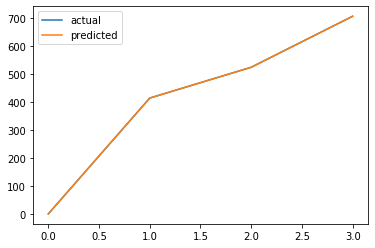

In [28]:
df_.plot()
plt.show()

In [29]:
# model.predict(X_train[-2].reshape(1, X_test[-1].shape[0], X_test[-1].shape[1]))
# model.predict(X_train[-2].reshape(1, X_train[-2].shape[0]))